# Development rig

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from waterwaves1.wave import wave1
from waterwaves1.packing import unpack1,pack1
from waterwaves1.fourier import IEj

In [2]:
L_d=24
Hmx_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
d=2*np.pi/L_d
N,s=40,d*(1+0.0*Hmx_d)
X=np.linspace(0,np.pi)

0.7 fail


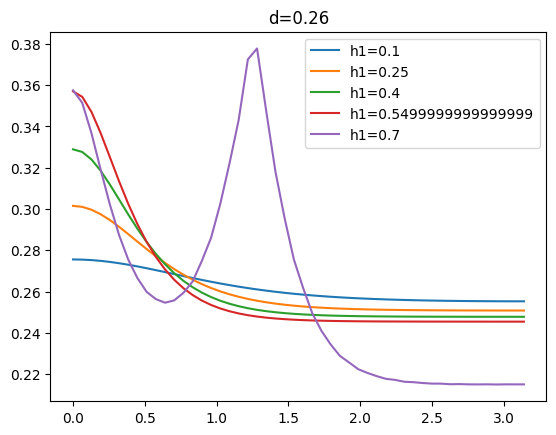

In [3]:
def plot(h):
    sol1=wave1(N,h*Hmx_d*d,d=d,scaler=s)
    Ej1,Q1,R1=unpack1(sol1.x)
    if not sol1.success:
        print(h,'fail')
    plt.plot(X,IEj([d,*Ej1],X),label=f"h1={h}")
    return sol1

for h in np.linspace(0.1,0.7,5):
    plot(h)
plt.legend()
plt.title(f'd={d:4.2f}')
plt.show()

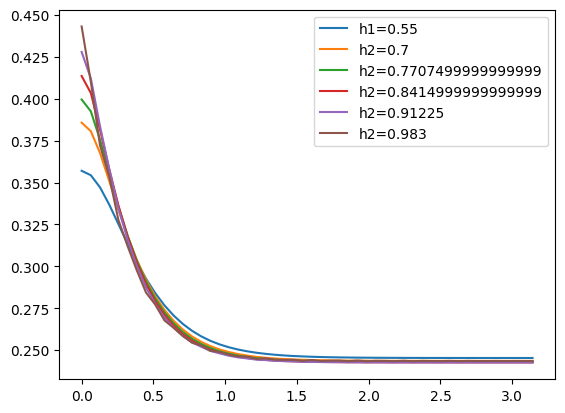

In [4]:
def step(h1,h2):
    sol1=wave1(N,h1*Hmx_d*d,d=d,scaler=s)
    Ej1,Q1,R1=unpack1(sol1.x)
    A2=pack1(h2*Ej1/h1,Q1,R1)
    sol2=wave1(N,h2*Hmx_d*d,d=d,scaler=s,A0=A2)
    if not sol2.success:
        print(h2,'fail step 2')    
    Ej2,Q2,R2=unpack1(sol2.x)
    plt.plot(X,IEj([d,*Ej2],X),label=f"h2={h2}")
    return sol2

plot(0.55)
for h in np.linspace(0.7,0.983,5):
    step(0.55,h)
plt.legend()
plt.show()